In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 105s 1us/step


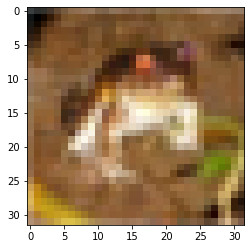

In [8]:
# FROG
plt.imshow(x_train[0])

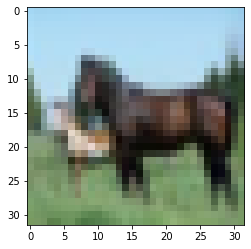

In [9]:
# HORSE
plt.imshow(x_train[12])

In [10]:
x_train[0].shape

(32, 32, 3)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [16]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7562 - accuracy: 0.3603 - val_loss: 1.5323 - val_accuracy: 0.4852
Epoch 2/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2371 - accuracy: 0.5605 - val_loss: 1.2611 - val_accuracy: 0.5693
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0614 - accuracy: 0.6284 - val_loss: 1.3223 - val_accuracy: 0.5506
Epoch 4/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9528 - accuracy: 0.6689 - val_loss: 1.1098 - val_accuracy: 0.6237
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8559 - accuracy: 0.7028 - val_loss: 1.0859 - val_accuracy: 0.6434
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7847 - accuracy: 0.7300 - val_loss: 1.0330 - val_accuracy: 0.6556
Epoch 7/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7165 - accuracy: 0.7542 - val_loss: 1.0911 -

In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.550147,0.44092,1.532322,0.4852
1,1.203760,0.57410,1.261095,0.5693
2,1.050110,0.63384,1.322302,0.5506
3,0.942587,0.67340,1.109766,0.6237
4,0.858541,0.70372,1.085924,0.6434


<AxesSubplot:>

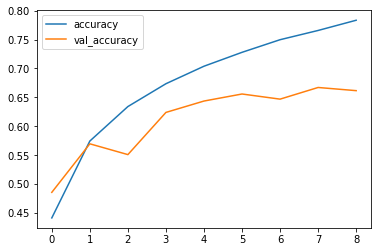

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

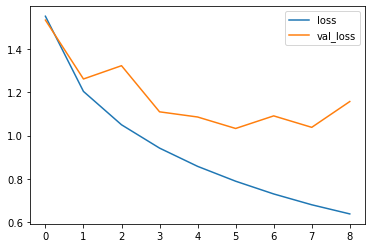

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1571635007858276, 0.6614000201225281]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/Users/yuriturygin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1000
           1       0.79      0.83      0.81      1000
           2       0.48      0.69      0.57      1000
           3       0.47      0.50      0.49      1000
           4       0.57      0.67      0.62      1000
           5       0.72      0.37      0.49      1000
           6       0.74      0.75      0.75      1000
           7       0.77      0.71      0.74      1000
           8       0.67      0.84      0.75      1000
           9       0.86      0.61      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



In [25]:
confusion_matrix(y_test,predictions)

array([[640,  18,  93,  18,  36,   3,  14,   9, 150,  19],
       [ 20, 828,  23,  12,   8,   3,  12,   4,  55,  35],
       [ 45,   9, 694,  41,  98,  20,  48,  23,  17,   5],
       [ 11,  12, 137, 500, 101,  67,  86,  39,  38,   9],
       [ 14,   1, 144,  64, 665,  12,  30,  48,  21,   1],
       [ 13,   6, 150, 259,  88, 367,  35,  60,  18,   4],
       [  6,  12,  76,  73,  55,   5, 750,  11,   9,   3],
       [ 17,   2,  66,  55,  82,  26,  10, 715,  15,  12],
       [ 53,  24,  29,  16,   9,   2,   9,   4, 844,  10],
       [ 49, 134,  35,  22,  18,   3,  13,  20,  95, 611]])

<AxesSubplot:>

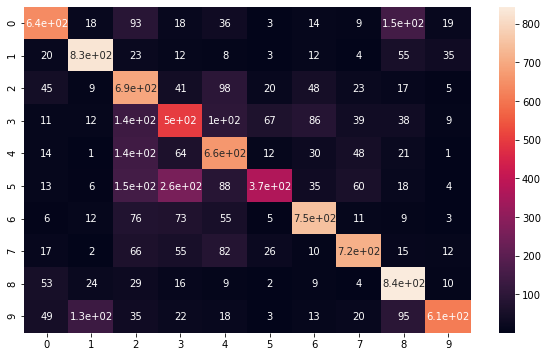

In [26]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [27]:
my_image = x_test[16]

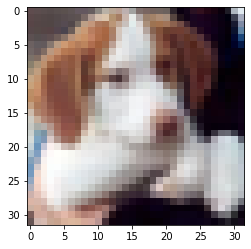

In [28]:
plt.imshow(my_image)

In [29]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

/Users/yuriturygin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

In [30]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html